# Turing Machines

In [ ]:
import sys
 

#----TURN THESE ON IF RUNNING ON JOVE ON COLAB by removing the triple quotes

'''
! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
import sys
sys.path.append('./Jove')
sys.path.append('./Jove/jove')
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
 
#---- ALWAYS INCLUDE BEFORE ANY call such as AnimateNFA, AnimateDFA, etc ----
# Unfortunately this has to be within EACH iframe... so can't hard-wire
# into the Animate... functions
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
'''

#----TURN THESE ON IF RUNNING ON OWN INSTALLATION (default turned-on)

sys.path[0:0] = ['../..','../../3rdparty',
                 '../../..','../../../3rdparty',
                 '../../../..','../../../../3rdparty',
                ] # Put these at the head of the search path
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)


#---- COMMON IMPORTS BELOW : Add more/less imports as needed/tolerable ---

# EMPTY imports for TM...

# DTM: accepts "a#x" where a is a substring of x

In [ ]:
help(explore_tm)
help(dotObj_tm)

In [ ]:
Asg6DTM = md2mc('''TM
!! a = 1
!! b = 0
!! X means no longer looking at
Input: #;#,S -> F1    !! Empty string
Input: a;1,R -> nextA !! We need to look for a next
Input: b;0,R -> nextB !! We need to look for b next

!! First we deal with the case where the next letter we want is to be an A
nextA: a;a,R | b;b,R -> nextA   !! We got to the end of the first string
nextA: #;#,R -> nextAMatch      !! Now we know we are in the next string and go till we can find a match
nextAMatch: X;X,R | b;X,R -> nextAMatch !! We know this is part of the string we have already looked at
nextAMatch: a;1,S -> goBackToStart1
nextAMatch: 0;0,R | 1;1,R -> nextAMatchWordStarted !! We know we are in the middle of the substring
nextAMatchWordStarted: 0;0,R | 1;1,R -> nextAMatchWordStarted !! Cycle till the character we haven't looked at
nextAMatchWordStarted: b;0,S -> clearState1 !! We have found a mismatch! We need to clear our progress
nextAMatchWordStarted: a;1,S -> goBackToStart1 !! We have a letter match and go back to the beginning of the input

!! Now we deal with the case where the next letter we want is B 
nextB: a;a,R | b;b,R -> nextB
nextB: #;#,R -> nextBMatch
nextBMatch: X;X,R | a;X,R -> nextBMatch
nextBMatch: b;0,S -> goBackToStart1
nextBMatch: 0;0,R | 1;1,R -> nextBMatchWordStarted
nextBMatchWordStarted: 0;0,R | 1;1,R -> nextBMatchWordStarted 
nextBMatchWordStarted: a;1,S -> clearState1 
nextBMatchWordStarted: b;0,S -> goBackToStart1 


!! Failure state - failed to match a word and we know that starting position is wrong
clearState1: 0;b,L | 1;a,L -> clearState1
clearState1: X;X,R -> clearState2
clearState2: a;X,L | b;X,L | X;X,L -> clearState2
clearState2: #;#,L -> clearState3
clearState3: a;a,L | b;b,L | 1;a,L | 0;b,L -> clearState3
clearState3: .;.,R -> Input   !! Go back to input

!! Go back to start
goBackToStart1: 0;0,L | 1;1,L | X;X,L -> goBackToStart1
goBackToStart1: #;#,L -> goBackToStart2
goBackToStart2: 0;0,S | 1;1,S -> FhaltFoundSubstring
goBackToStart2: b;b,S | a;a,S -> goBackToStart3
goBackToStart3: a;a,L | b;b,L -> goBackToStart3
goBackToStart3: 0;0,R | 1;1,R -> Input
''')
dotObj_tm(Asg6DTM)

In [ ]:
explore_tm(Asg6DTM, "aa#babaaababb", 110)

In [ ]:
explore_tm(Asg6DTM, "aba#aba",110)

In [ ]:
explore_tm(Asg6DTM, "aba#ab",110)

In [ ]:
explore_tm(Asg6DTM, "aba#baba",110)

In [ ]:
explore_tm(Asg6DTM, "aba#babba",110)

In [ ]:
explore_tm(Asg6DTM, "bba#bbabba",110)

In [ ]:
explore_tm(Asg6DTM, "aba#bbabba",240)

In [ ]:
dotObj_tm(Asg6DTM, FuseEdges=True)

In [ ]:
# *** MAKE SURE TO SET FUEL TO 100 OR SO ***
AnimateTM(Asg6DTM, FuseEdges=True)


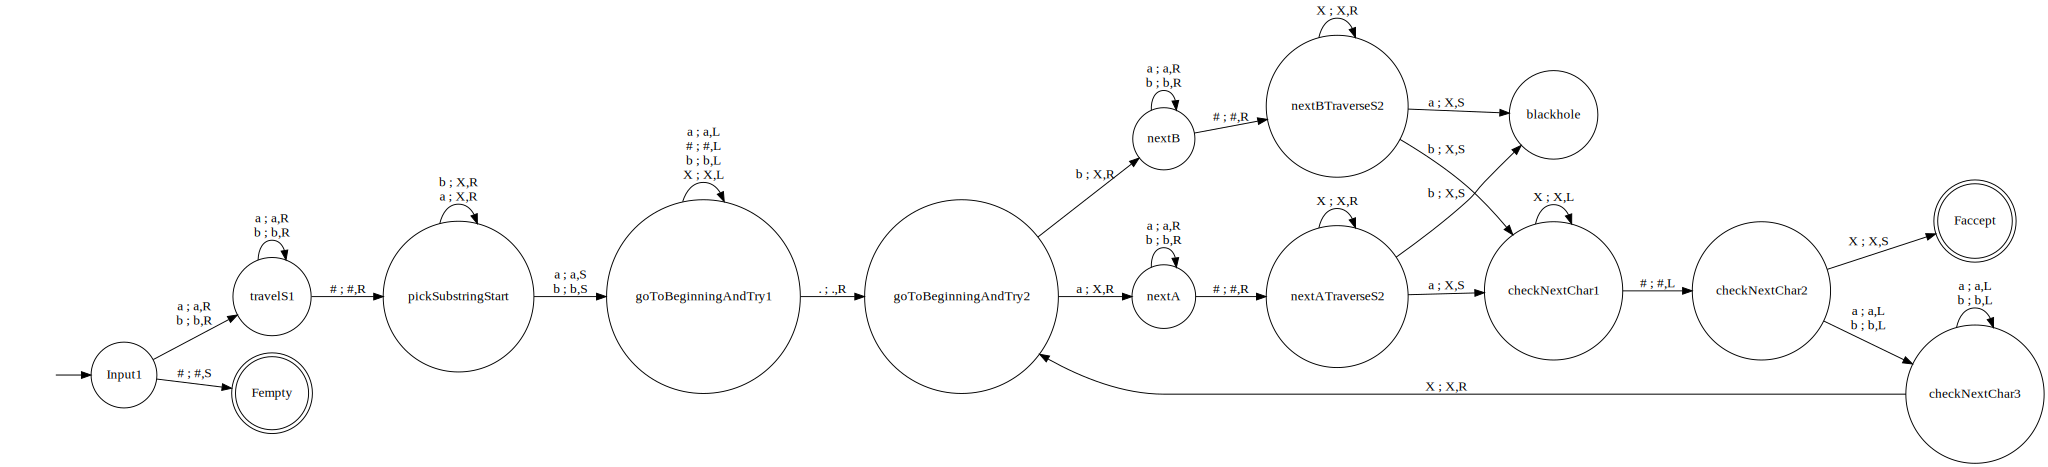

In [62]:
Asg6NDTM = md2mc('''TM
Input1: #;#,S -> Fempty !! Empty String
Input1: a;a,R | b;b,R -> travelS1
travelS1: a;a,R | b;b,R -> travelS1 !! Go till the end of s1
travelS1: #;#,R -> pickSubstringStart !! Start traversing s2
pickSubstringStart: a;X,R | b;X,R -> pickSubstringStart !! X out characters we don't check
pickSubstringStart: a;a,S | b;b,S -> goToBeginningAndTry1 !! We start at this point - we restart at the beginning of the input

!! Assumes we have already choosen a starting place for the substring
goToBeginningAndTry1: a;a,L | b;b,L | #;#,L | X;X,L -> goToBeginningAndTry1
goToBeginningAndTry1: .;.,R -> goToBeginningAndTry2
goToBeginningAndTry2: a;X,R -> nextA
goToBeginningAndTry2: b;X,R -> nextB

!! Case we look for A next
nextA: a;a,R | b;b,R -> nextA !! Get to the end of S1
nextA: #;#,R -> nextATraverseS2 !! Found end of S1
nextATraverseS2: X;X,R -> nextATraverseS2 !! Go till we haven't checked
nextATraverseS2: a;X,S -> checkNextChar1 !! We have a match and go on to check the next char
nextATraverseS2: b;X,S -> blackhole !! We have a mismatch and go to a blackhole

!! Case we look for B next
nextB: a;a,R | b;b,R -> nextB !! Get to the end of S1
nextB: #;#,R -> nextBTraverseS2 !! Found end of S1
nextBTraverseS2: X;X,R -> nextBTraverseS2 !! Go till we haven't checked
nextBTraverseS2: b;X,S -> checkNextChar1 !! We have a match and go on to check the next char
nextBTraverseS2: a;X,S -> blackhole !! We have a mismatch and go to a blackhole

!! When we found the next match and need to go back to where we left off on s1
checkNextChar1: X;X,L -> checkNextChar1
checkNextChar1: #;#,L -> checkNextChar2
checkNextChar2: X;X,S -> Faccept
checkNextChar2: a;a,L | b;b,L -> checkNextChar3
checkNextChar3: a;a,L | b;b,L -> checkNextChar3
checkNextChar3: X;X,R -> goToBeginningAndTry2

''')
dotObj_tm(Asg6NDTM, FuseEdges=True)

In [65]:
explore_tm(Asg6NDTM, "ab#bbabb", 100)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('blackhole', 11, '........Xb#Xbabb', 87)
 via .. 
 ->('Input1', 0, 'ab#bbabb', 100)
 ->('travelS1', 1, 'ab#bbabb', 99)
 ->('travelS1', 2, 'ab#bbabb', 98)
 ->('pickSubstringStart', 3, 'ab#bbabb', 97)
 ->('goToBeginningAndTry1', 3, 'ab#bbabb', 96)
 ->('goToBeginningAndTry1', 2, 'ab#bbabb', 95)
 ->('goToBeginningAndTry1', 1, 'ab#bbabb', 94)
 ->('goToBeginningAndTry1', 0, 'ab#bbabb', 93)
 ->('goToBeginningAndTry1', 7, '........ab#bbabb', 92)
 ->('goToBeginningAndTry2', 8, '........ab#bbabb', 91)
 ->('nextA', 9, '........Xb#bbabb', 90)
 ->('nextA', 10, '........Xb#bbabb', 89)
 ->('nextATraverseS2', 11, '........Xb#bbabb', 88)
 ->('blackhole', 11, '........Xb#Xbabb', 87)
Rejected at  ('blackhole', 12, '........Xb#

In [ ]:
# *** MAKE SURE TO SET FUEL TO 100 OR SO ***
AnimateTM(Asg6NDTM, FuseEdges=True)
